In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(seed=1)

def make_training_data():
    X_min = 4
    X_max = 30
    X_n = 16
    return 5 + 25 * np.random.rand(X_n)

def make_teach_data(x, x_n):
    Prm_c = [170, 108, 0.2]
    return Prm_c[0] - Prm_c[1] * np.exp(-Prm_c[2] * x) + 4 * np.random.randn(x_n)

X = make_training_data()
T = make_teach_data(X, 16)

print(np.round(X, 2))    # 小数点以下2桁で数値を表す
print(np.round(T, 2))

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


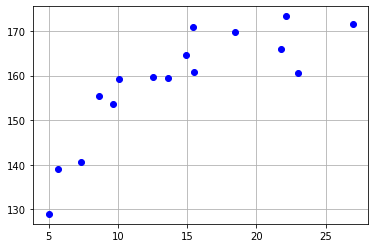

In [2]:
plt.plot(X, T, marker='o', linestyle='None', color='#0000ff')
plt.grid()
plt.show()

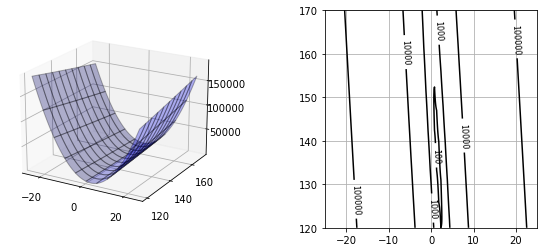

In [7]:
from mpl_toolkits.mplot3d import Axes3D

def mse_line(x, t, w):
    y = w[0] * x + w[1]
    return np.mean((y - t) ** 2)

xn = 100
w0_range = [-25, 25]
w1_range = [120, 170]
w0 = np.linspace(w0_range[0], w0_range[1], xn)
w1 = np.linspace(w1_range[0], w1_range[1], xn)
ww0, ww1 = np.meshgrid(w0, w1)    # (100, 100): length
J = np.zeros((len(w0), len(w1)))
for i0 in range(len(w0)):
    for i1 in range(len(w1)):
        J[i1, i0] = mse_line(X, T, (w0[i0], w1[i1]))

plt.figure(figsize=(9.5, 4))
plt.subplots_adjust(wspace=0.5)
ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(ww0, ww1, J, rstride=10, cstride=10, alpha=0.3, color='#0000ff', edgecolor='#000000')
ax.set_xticks([-20, 0, 20])
ax.set_yticks([120, 140, 160])
ax.view_init(20, -60)

plt.subplot(1, 2, 2)
cont = plt.contour(ww0, ww1, J, 30, colors='#000000', levels=[100, 1000, 10000, 100000])
plt.clabel(cont, fmt='%d', fontsize=8)
plt.grid()
plt.show()